STEP0. 
Imported libraries for us to use 

In [78]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import pandas

# Step 1.

### Set up the MLPClassifier into usable subsets for our machine learning model used to predict
### This involves filtering Null values, splitting testing and training sets, and structuring an initial MLP model

In [79]:
### Import data from .csv file [ winequality-white.csv ]
### Structure the dataset into a clean datastructure used for our model
dataset = pandas.read_csv(r"C:\Users\gabri\Downloads\winequality-white.csv")
dataset.dropna(inplace=True)


# Split the dataset into test & training sets
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset['quality'], test_size=0.2, random_state=42)

# Features
X = X_train.drop('quality', axis=1) 
# Target Attribute to predict
y = y_train

# Scalar() actually haults the results at the end and is not optimal for neither of the models


### Visualize and Describe dataset for further analysis


In [80]:
# Display head and tail of dataset
print(dataset.head())
print(dataset.tail())

print("\n\n\n") # Add space 


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [81]:
# Give statistics of the dataset
print(dataset.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

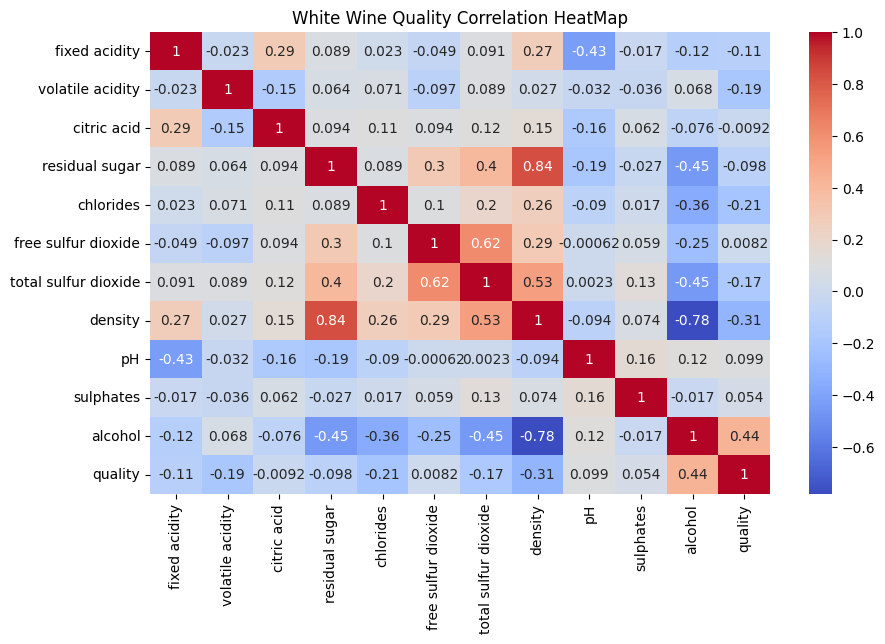

In [82]:
### Visualize the correlation of the [ dataset ] via heatmap 
### To visualize and analyze which attributes have higher correlation to the target value
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('White Wine Quality Correlation HeatMap')
plt.show()

# Step 2.
## Initialize the MLPClassifier [ mlp_model ] with *default parameters and the clean dataset subsets

In [83]:
# Init the MLPClassifier
mlp_model = MLPClassifier(max_iter=3000, random_state=42, tol=1e-5)
mlp_untunned_score = cross_val_score(mlp_model, X_train, y_train, cv=5)
print(f"Untunned MLPClassifier yields Accurary of: {mlp_untunned_score.mean()}")

Untunned MLPClassifier yields Accurary of: 0.9969368207052935


The performance of the base model 

# Step 3.

### Hypertune the mlp_model's parameters for more accuary and better model performance using the param grid 

In [84]:
# Hyperparameter tunning for the MLPClassifier model
# Perform grid search to find the most optimal combination for our mlp_model
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50, 50), (100, 100, 50, 50)],
    'solver': ['adam'],  
    'learning_rate_init': [0.1, 0.2, 0.3, 0.001],
    'activation': ['relu', 'tanh'],
    'batch_size': [100, 50]
}

mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
mlp_grid_search.fit(X_train, y_train)


print(f"Best paramters: {mlp_grid_search.best_params_}")
print(f"Best Score: {mlp_grid_search.best_score_}")

Best paramters: {'activation': 'relu', 'batch_size': 50, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best Score: 0.9987241639951


# Step 3 Continued...
# Score the MLP Model via 3 scoring methods
### F1, accuracy, & the classification report

In [85]:
# MLPClassifier Scoring 

### Accuracy
y_pred = mlp_grid_search.best_estimator_.predict(X_test)
accurary_score = accuracy_score(y_test, y_pred)
print(f"Accurary Score: {accuracy_score}")

### Classification Report
print(f"Classification Report: {classification_report(y_test, y_pred)}")

### F1 Score
f1_rating = f1_score(y_test, y_pred, average='macro')
print(f"Non-weighted f1 score: {f1_rating}")
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted f1 score: {f1_weighted}")



Accurary Score: <function accuracy_score at 0x00000172D7EB5300>
Classification Report:               precision    recall  f1-score   support

           3       1.00      0.80      0.89         5
           4       0.96      1.00      0.98        25
           5       1.00      1.00      1.00       291
           6       1.00      1.00      1.00       432
           7       1.00      1.00      1.00       192
           8       1.00      1.00      1.00        35

    accuracy                           1.00       980
   macro avg       0.99      0.97      0.98       980
weighted avg       1.00      1.00      1.00       980

Non-weighted f1 score: 0.9777345052223101
Weighted f1 score: 0.9979127822700719


Based on my findings my prediction is that the MLPClassifier is "over kill" for predicting the task at hand 
I belive that a neueral model like MLP is better fit for larger datasets with more complex tasks.

The model's speed is a magnitude larger than the run time of the decision tree classifier and other model's that I tested for performance in Homework 2 based off my tests.
Although this model is highly accurate with its predictions, giving a basically perfect score all across all 3 scoring methods, the tree model performed just as well with lesser runtimes.

This brings up the question, what task is better fitted for the MLP model? As for this dataset and problem I belive that MLP is not needed and can be replaced with a "lesser" model such as the Decision Tree Classifier as shown next.

# Step 4.

### Test another model, in this case I will use the best performing model from Homework 2 and then test both model's with a random sample from the dataset and then evaluate and finalize my findings

In [86]:
# I will use the best performer from HW 2
# The model was a Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
tree_params = {'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5)
tree_grid.fit(X_train, y_train) 
print(f'Best DT Params: {tree_grid.best_params_}')  
print("Score:", tree_grid.best_score_)

# Model Selection
best_model = tree_grid.best_estimator_

y_pred = best_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best DT Params: {'criterion': 'gini', 'max_depth': 5}
Score: 1.0
Accuracy: 1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00       291
           6       1.00      1.00      1.00       432
           7       1.00      1.00      1.00       192
           8       1.00      1.00      1.00        35

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



## Sample dataset for a random index and then use that to predict the true label based off both model's after tuning

In [110]:
### Find random data test rows to validate the models performance 
import random
random_index = random.randint(0, len(dataset) - 1)
random_row = dataset.iloc[random_index]

# Chosen data sample from random index
features = random_row
true_label = random_row

# The actual quality level that is being predicted
print("True Quality Data", true_label['quality'])

# The Decision Tree Classifier Model's Prediction
prediction = best_model.predict(features.values.reshape(1,-1))
print("Tree Model Prediction", prediction[0])


# The MLP Classifier's Prediction
mlp_prediction = mlp_grid_search.best_estimator_.predict(features.values.reshape(1,-1))
print("MLP Model Prediction", mlp_prediction[0])

True Quality Data 7.0
Tree Model Prediction 7
MLP Model Prediction 7


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


# Abstract 

## Performance:
The Random Tree Classifier's runtime is on avarage about ~1second to find the best tunning for the model and to run an initial default model

The MLPClassifier's runtime on average is about ~2.2 minutes to tune the model and find the best hyperparameters and about ~42secs to run the initial default model

## Score:
There is little difference in the performance of both model's scores as they both are highly precise in their scoring and predictions. Though the Random Tree model is just a tiny bit better by about ~0.0002 percent on average. Thus, the difference is very miniscule and both perform the task as expected.

## Findings:
I found that the test in hand did not require a model of this magnitude. In terms of overral functionallity the model DOES work and it is very optimal for this test case, but I think this model is better suited for larger tasks that requiere this much computing power, as my cpu usage varied for each model. Yet, what if the dataset contained more attributes and/or a larger dataset? I believe that the results may have been different, but since that is not the case I can conclude for this dataset that the use of this model is not optimal in terms of computing resources, runtime, and complexity of the problem.